<a href="https://colab.research.google.com/github/elenaaalmg/PracticasComputacionII/blob/main/CII_TareaII_AGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método gráfico:

Método de la búsqueda incremental:
X [-8.5        -8.49863512 -8.49727025 ... -7.00272975 -7.00136488
 -7.        ]
El tiempo total transcurrido de la busqueda incremental fue 0.6245284080505371 s

Método de la bisección:
No existe un cambio de signo

Método de Newton-Raphson:
La raíz de la función es: -210003/2


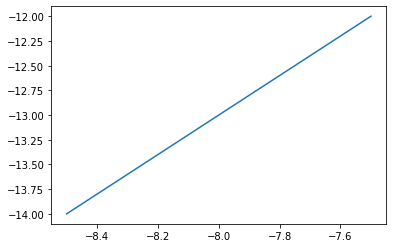

In [ ]:
'''
  Elena Almanza García
  19/03/2022
  elena.almg@gmail.com
'''

import numpy as np
from sympy.abc import x,y
import matplotlib.pyplot as plt
import time
import math


class Graph:
  def graph2DPlot(self, start, end, equation):
    X = np.arange(start,end)
    Y = np.zeros_like(X)
    for i in range(len(X)): #itera desde cero hasta el tamaño de mi arreglo
      Y[i] = equation.subs(x, X[i]) #evalua la función en todos los puntos de x; .subs sustituye el valor de x por X[i]
    plt.plot(X,Y)


class NaiveMethods:
  def incrementalSearch(self, a, b, func):
    X = np.linspace(a, b, 1100)
    print("X", X)
    Y = np.zeros_like(X)
    start = time.time()
    for i in range(len(X)):
      if func.subs(x, X[i]) == 0:
        print("La raíz real es", X[i])
    end = time.time()
    print("El tiempo total transcurrido de la busqueda incremental fue", (end-start), "s")


class NumericalMethods:
  def bisectionMethod(self, a, b, f, tol, maxIter):
    error = np.inf
    iter = 0

    while (error > tol)  or (iter > maxIter): #para cuando error < tol o iter > maxIter (numero de iteraciones másximas superadas)
      fa = f.subs(x, a) #función cuando x = a
      fb = f.subs(x, b) #función cuando x = b

      #verificar si existe un cambio de signo
      if fa * fb < 0:
        print("Existe un cambio de signo")
        c = (a + b) / 2 #si existe el cambio de signo se crea un tercer numero (punto medio)
        fc = f.subs(x, c) #evaluar la función f en c

        #verficar si la raíz se puede encontrar en los intervalos
        if fa * fc < 0: #la raíz está en ese intervalo (a,c)
          a = a
          b = c
          print("La raíz de",f,"se encuentra en el intervalo",a,",",c)

        elif fa * fc > 0: #la raíz está en ese intervalo (c,b)
          a = c
          b = b
          print("La raíz de",f,"se encuentra en el intervalo",c,",",b)
      
        elif fa * fc == 0:
          print("La raíz de",f,"se ecuentra en",c)
          break
          exit(0)
        
        error = abs(b-a)
        iter = iter + 1

      else:
        print("No existe un cambio de signo")
        break
        exit(0)

  def newtonRaphson(self, Xn, f, tol, maxIter):
    error = np.inf 
    iter = 0
    fXn = f.subs(x, Xn) #se evalua la función en un punto inicial
    fprime = f.diff(x) #derivada de la función
    fprimeXn = fprime.subs(x, Xn) #se evalua la derivada en un punto inicial

    while (error > tol and iter <= maxIter):
      if fprimeXn == 0:
        print('Indeterminación') #pq, recordemos que cualquier cosa dividida de 0 nos da una indeterminación
        break
        
      else: 
        Xn1 = Xn - (fXn / fprimeXn)
        error = abs(Xn1 -Xn)
        Xn  = Xn1
        iter = iter + 1
        
    if iter == maxIter: 
      print ( 'El método no convergió')

    else: 
      print ('La raíz de la función es:', Xn1)

    return Xn1


def main():
    
    # Definición del intervalo cerrado (en la derecha) de evaluación
    a = -8.5
    b = -7
    tol = 0.000003
    maxIter = 30000
    f = 2*x + 3
    x0 = 2

    # Objeto para crear gráficos
    objG = Graph() 
    print("Método gráfico:")
    # resolver empleando el método gráfico en  2D
    objG.graph2DPlot(a,b, f)
    
    #objeto de la clase NeiveMethods
    objN = NaiveMethods()
    print("\nMétodo de la búsqueda incremental:")
    #manda llamar la función de la busqueda incremental
    objN.incrementalSearch(a, b, f)

    #Objeto de la clase NumericalMethods
    objNM = NumericalMethods()
    print("\nMétodo de la bisección:")
    #ejecutar la función de la bisección
    objNM.bisectionMethod(a,b,f,tol,maxIter)
    print("\nMétodo de Newton-Raphson:")
    #manda llamar el metodo de Newton Raphson
    objNM.newtonRaphson(x0,f,tol,maxIter)


if __name__ == "__main__":
    main()